# What the heck am I doing here: an Overview

The first thing a new reader should do is to review the PDF in the attached git repository.

There are three interesting components to this paper. I've included a quote below

"First we show that for a randomly
initialized neural network with sufficiently many
hidden units, the generic gradient descent algo-
rithm learns any low degree polynomial, assum-
ing we initialize the weights randomly. Secondly,
we show that if we use complex-valued weights
(the target function can still be real), then un-
der suitable conditions, there are no “robust lo-
cal minima”: the neural network can always es-
cape a local minimum by performing a random
perturbation. This property does not hold for
real-valued weights. Thirdly, we discuss whether
sparse polynomials can be learned with small
neural networks, with the size dependent on the
sparsity of the target function." - Learning Polynomials with Neural Networks

The goal of the paper was to present some evidence supporting the effectiveness of neural networks, and I wish to further supplement that evidence by investigating some of their claims in this notebook.

## Result 1

We wish to investigate if, "for a randomly initialized neural network with sufficiently many hidden units, the generic gradient descent algorithm learns any low degree polynomial, assuming we initialize the weights randomly."

The most trivial polynomial is the constant zero. However, trying to verify that a neural network can duplicate this result is like trying to use a flamethrower to light a birthday candle.

Recall the universal approximation theorem: 
https://en.wikipedia.org/wiki/Universal_approximation_theorem

If the function we wish to model is constant, I think it follows trivially from this that a neural network is sufficiently powerful. Specifically, setting all the weights and biases to zero, and using any typical, sigmoidal, activation function should do the trick.

Let's use a slightly less trivial example.

f_1(x) = 2x+1



In [29]:
import numpy as np
import matplotlib.pyplot as plot
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import optimizers
from keras import losses
from keras.utils.vis_utils import plot_model
from IPython.display import Image

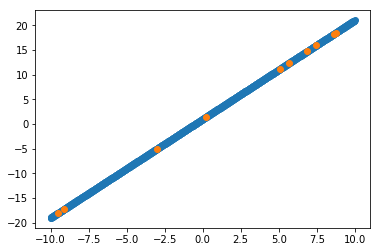

In [2]:
f1 = lambda x: 2*x + 1
xmin = -10
xmax = 10
trainSize = 1000
testSize = 10

def generateSets(f):
    xTrain = np.linspace(xmin,xmax,trainSize)
    yTrain = f(xTrain)
    xTest = np.random.uniform(xmin, xmax, testSize)
    yTest = f(xTest)
    return [[xTrain, yTrain], [xTest, yTest]]

[[x1, y1], [x2, y2]] = generateSets(f1)
plot.scatter(x1,y1)
plot.scatter(x2,y2)
plot.show()

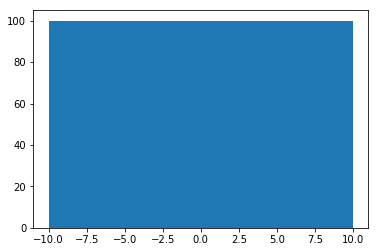

In [3]:
plot.clf()
plot.hist(x1)
plot.show()

In [42]:
plot.clf()
model = Sequential()
model.add(Dense(1,input_shape= (1,), kernel_initializer='random_uniform' ,use_bias=False))
model.add(Dense(2,kernel_initializer='random_uniform', use_bias=False))
model.add(Dense(2,kernel_initializer='random_uniform', use_bias=False))
model.add(Dense(2,kernel_initializer='random_uniform', use_bias=False))
model.add(Dense(2,kernel_initializer='random_uniform', use_bias=False))
model.add(Dense(2,kernel_initializer='random_uniform', use_bias=False))
model.add(Dense(2,kernel_initializer='random_uniform', use_bias=False))
model.add(Dense(1,kernel_initializer='random_uniform', use_bias=False))
model.compile(optimizer=optimizers.adagrad(), loss=losses.mean_squared_error)
model.fit(x1,y1)

# plot_model(model)

Epoch 1/10
1000/1000 [==============================] - 0s - loss: 134.6003     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 134.6003     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 134.6003     
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 134.6003     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 134.6003     
Epoch 6/10
1000/1000 [==============================] - 0s - loss: 134.6003     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 134.6003     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 134.6003     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 134.6003     
Epoch 10/10
1000/1000 [==============================] - 0s - loss: 134.6003     


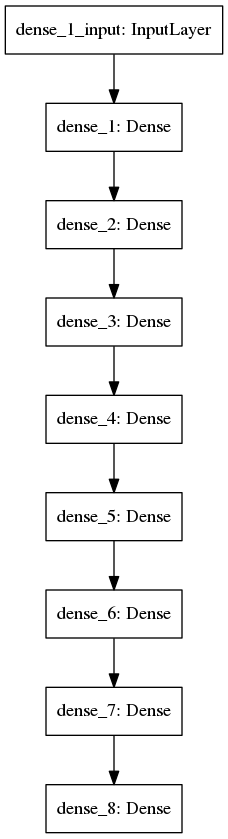

In [30]:
file1 = 'model1.png'
plot_model(model, to_file=file1)
Image(file1)

In [6]:
score = model.evaluate(x2,y2)
print(score)

10/10 [==============================] - 0s
0.993327438831


Let's try another model

In [40]:
model2 = Sequential()
model2.add(Dense(1, input_shape=(1,), kernel_initializer='random_uniform', use_bias=False))
model2.add(Dense(1, input_shape=(2,), kernel_initializer='random_uniform', use_bias=False))
model2.compile(optimizer=optimizers.adagrad(), loss=losses.mean_squared_error)
model2.fit(x1,y1)
score2 = model.evaluate(x2,y2)
print(score2)

Epoch 1/10
1000/1000 [==============================] - 0s - loss: 133.3099     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 130.3362     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 127.2490     
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 124.1855     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 121.1392     
Epoch 6/10
1000/1000 [==============================] - 0s - loss: 118.1126     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 115.1531     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 112.2825     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 109.4215     
Epoch 10/10
10/10 [==============================] - 0s
167388.671875


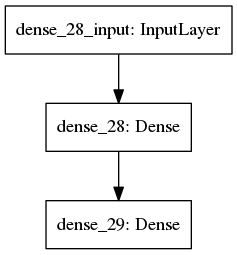

In [38]:
file2 = 'model2.png'
plot_model(model2, to_file=file2)
Image(file2)

Let's see how these models handle a cubic function

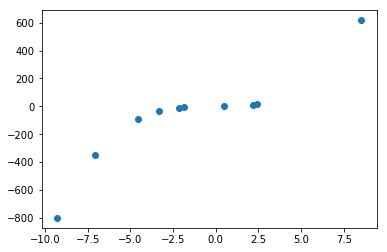

In [8]:
f2 = lambda x: x**3
[[xTrain, yTrain], [xTest, yTest]] = generateSets(f2)
plot.clf()
plot.scatter(xTest,yTest)
plot.show()

In [12]:
model.reset_states()
model.fit(xTrain, yTrain)

Epoch 1/10
1000/1000 [==============================] - 0s - loss: 23014.8684     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 23021.3834     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 23021.8060     
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 23020.5560     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 23013.7612     
Epoch 6/10
1000/1000 [==============================] - 0s - loss: 23015.6059     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 23011.8344     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 23009.1968     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 23021.9741     
Epoch 10/10
1000/1000 [==============================] - 0s - loss: 23018.7504     


In [13]:
model1ScoreCubic = model.evaluate(xTest, yTest)
print(model1ScoreCubic)

10/10 [==============================] - 0s
19215.6816406


In [20]:
model2.reset_states()
model2.fit(xTrain, yTrain)

Epoch 1/10
1000/1000 [==============================] - 0s - loss: 142553.1616     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 142264.2162     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 142046.1171     
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 141858.9625     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 141687.3621     
Epoch 6/10
1000/1000 [==============================] - 0s - loss: 141528.5161     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 141375.8455     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 141228.7893     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 141085.1204     
Epoch 10/10
1000/1000 [==============================] - 0s - loss: 140944.9020     


In [21]:
model2ScoreCubic = model.evaluate(xTest, yTest)
print(model2ScoreCubic)

10/10 [==============================] - 0s
19215.6816406


# The story so far

Model1 is complex but has a great accuracy. Model2 is simpler with worse accuracy. However, the dilemma is this:
neither are the model that is described in the paper.
Let's proceed by using the specifically defined model from the paper, specifically in Theorem 4.2:

In [49]:
import keras.layers.core
def getModel(layers):
    '''Defines a sequential neural network with the specified number of layers,
    using randomly initialized weights and an exponential activation function'''
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), kernel_initializer='zeros', use_bias=False))
    for i in range(1,layers):
        model.add(Dense(2, kernel_initializer='zeros'))
        model.add(keras.layers.core.Lambda(lambda x: np.e**x))
    m = model.count_params()
    gradientDescent = optimizers.SGD(lr=1/(4*m), )
    model.compile(optimizer=gradientDescent, loss=losses.mean_squared_error)
    return model

testingModel = getModel(3)
testingModel.fit(x1,y1)
testingModelScore = testingModel.evaluate(x2,y2)
print(testingModelScore)

ValueError: Error when checking model target: expected lambda_2 to have shape (None, 2) but got array with shape (1000, 1)